### Exponential LPN Algorithm: Brute Force for All Possible Secret Values

The Learning Parity with Noise (LPN) problem involves recovering a secret vector `u` from noisy linear equations. The brute force approach explores all possible values of `u` to find the one that best explains the observed data.


1. **Generate All Possible Secrets**:
   - For a secret of length `n`, there are \(2^n\) possible values. Generate all binary combinations of length `n`.

2. **Simulate and Check**:
   - For each candidate secret `u_candidate`:
     - Compute \( A \cdot u_{candidate} \).
     - Compare with `b` to count mismatches (noise discrepancies).

3. **Score Each Candidate**:
   - Calculate the number of mismatches (Hamming distance) between \( A \cdot u_{candidate} \) and `b`.

4. **Select the Best Candidate**:
   - The secret with the minimum mismatch score is the most likely true secret.

---


In [1]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

In [2]:

def generate_lpn_instance(n, m, p, u):
    A = np.random.randint(2, size=(m, n), dtype=np.uint8)
    e = np.random.binomial(1, p, size=m).astype(np.uint8)
    b = (np.dot(A, u) + e) % 2
    return A, b

In [3]:
def exponential_lpn_solver(A, b):
    n = A.shape[1]
    m = A.shape[0]
    best_u = None
    min_mismatches = m  #initialized to max

    for candidate in product([0, 1], repeat=n):
        u_candidate = np.array(candidate, dtype=np.uint8)
        b_candidate = np.dot(A, u_candidate) % 2
        
       
        mismatches = np.sum(b_candidate != b)
        #revaluate best_u and min_mismatches
        if mismatches < min_mismatches:
            min_mismatches = mismatches
            best_u = u_candidate
    
    return best_u

### EXAMPLE USAGE:

In [7]:
# Parameter setting
n, m, p = 4, 16, 0.25
u = np.random.randint(2, size=n, dtype=np.uint8)  # Fixed secret vector
print("Fixed secret vector (u):", u)

Fixed secret vector (u): [1 0 1 0]


In [10]:

A, b = generate_lpn_instance(n, m, p, u)
recovered_u = exponential_lpn_solver(A, b)
print("Original vector:", u)
print("Recovered vector", recovered_u)

Original vector: [1 0 1 0]
Recovered vector [1 0 1 0]


In [11]:
success_count = 0
trials = 100
    
for _ in range(trials):
    A, b = generate_lpn_instance(n, m, p, u)
    recovered_u = exponential_lpn_solver(A, b)
    if np.array_equal(recovered_u, u):
        success_count += 1
    
success_rate = success_count / trials * 100
print(f"Success rate over {trials} trials: {success_rate:.2f}%")

Success rate over 100 trials: 60.00%


### PLOTTING RESULTS

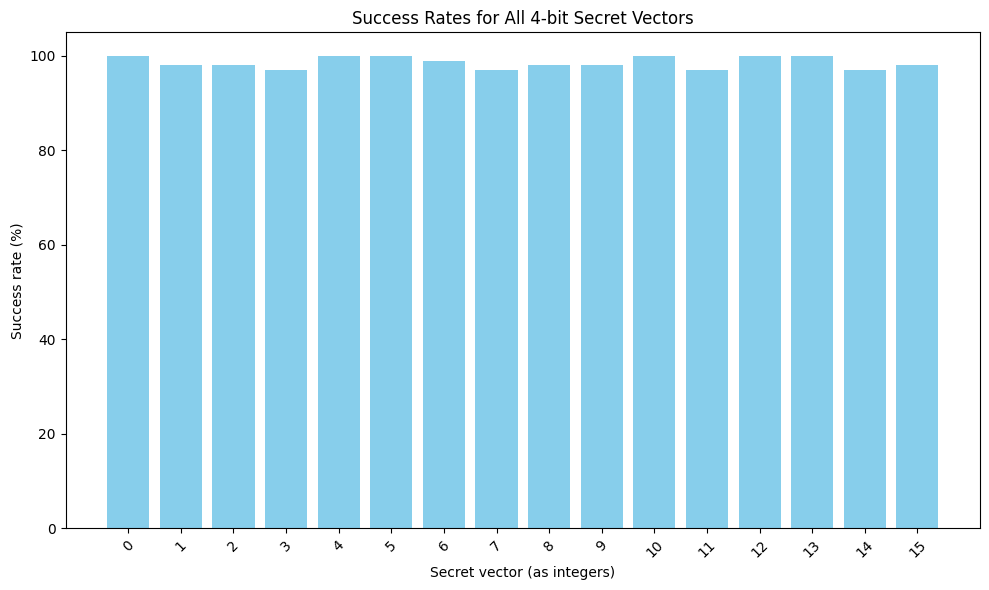

In [15]:

n, m, p = 4, 64, 0.25  # Parameters
trials = 100
secret_vectors = list(product([0, 1], repeat=n))  # All possible n-bit secrets
success_rates = []

for u in secret_vectors:
    u = np.array(u, dtype=np.uint8)
    success_count = 0
    
    for _ in range(trials):
        A, b = generate_lpn_instance(n, m, p, u)
        recovered_u = exponential_lpn_solver(A, b)
        if np.array_equal(recovered_u, u):
            success_count += 1
    
    success_rate = success_count / trials * 100
    success_rates.append(success_rate)

# Plotting
plt.figure(figsize=(10, 6))
secrets_as_ints = [int("".join(map(str, vec)), 2) for vec in secret_vectors]
plt.bar(secrets_as_ints, success_rates, color="skyblue")
plt.xlabel("Secret vector (as integers)")
plt.ylabel("Success rate (%)")
plt.title(f"Success Rates for All {n}-bit Secret Vectors")
plt.xticks(secrets_as_ints, rotation=45)
plt.tight_layout()
plt.show()

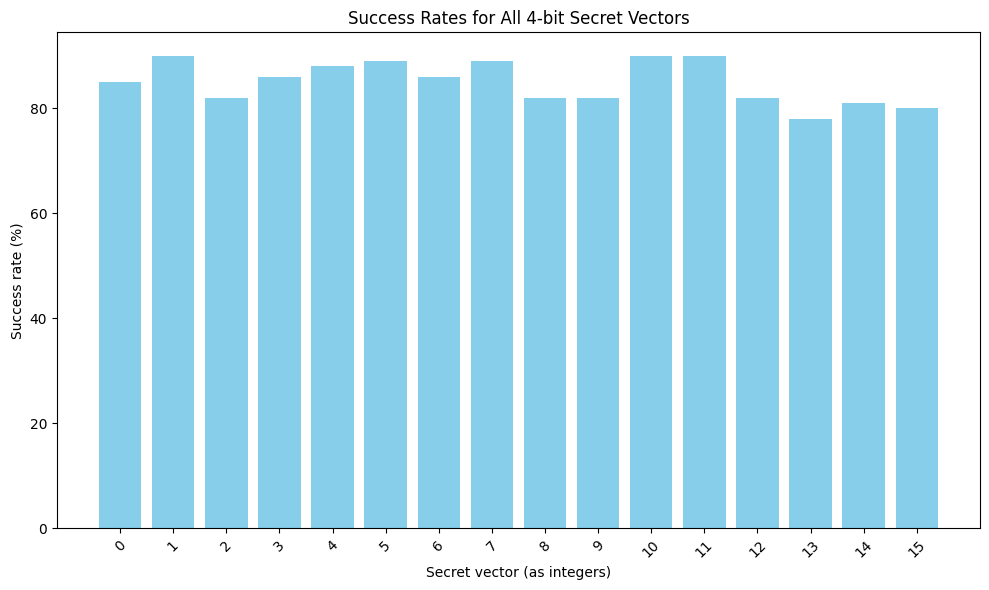

In [16]:

n, m, p = 4, 32 , 0.25  # Parameters
trials = 100
secret_vectors = list(product([0, 1], repeat=n))
success_rates = []

for u in secret_vectors:
    u = np.array(u, dtype=np.uint8)
    success_count = 0
    
    for _ in range(trials):
        A, b = generate_lpn_instance(n, m, p, u)
        recovered_u = exponential_lpn_solver(A, b)
        if np.array_equal(recovered_u, u):
            success_count += 1
    
    success_rate = success_count / trials * 100
    success_rates.append(success_rate)

# Plotting
plt.figure(figsize=(10, 6))
secrets_as_ints = [int("".join(map(str, vec)), 2) for vec in secret_vectors]
plt.bar(secrets_as_ints, success_rates, color="skyblue")
plt.xlabel("Secret vector (as integers)")
plt.ylabel("Success rate (%)")
plt.title(f"Success Rates for All {n}-bit Secret Vectors")
plt.xticks(secrets_as_ints, rotation=45)
plt.tight_layout()
plt.show()

In [17]:
average_success_rate = np.mean(success_rates)
print(f"Average success rate: {average_success_rate:.2f}%")

Average success rate: 85.00%


Instance (n=4, m=20): Success Rate = 83.00%
Instance (n=4, m=20): Success Rate = 87.00%
Instance (n=4, m=20): Success Rate = 79.00%
Instance (n=4, m=20): Success Rate = 80.00%
Instance (n=4, m=20): Success Rate = 85.00%
Instance (n=4, m=20): Success Rate = 79.00%
Instance (n=4, m=20): Success Rate = 74.00%
Instance (n=4, m=20): Success Rate = 75.00%
Instance (n=4, m=20): Success Rate = 91.00%
Instance (n=4, m=20): Success Rate = 89.00%
n=4, Average Success Rate: 82.20%, m=20
Instance (n=5, m=25): Success Rate = 81.00%
Instance (n=5, m=25): Success Rate = 77.00%
Instance (n=5, m=25): Success Rate = 86.00%
Instance (n=5, m=25): Success Rate = 78.00%
Instance (n=5, m=25): Success Rate = 79.00%
Instance (n=5, m=25): Success Rate = 83.00%
Instance (n=5, m=25): Success Rate = 89.00%
Instance (n=5, m=25): Success Rate = 84.00%
Instance (n=5, m=25): Success Rate = 85.00%
Instance (n=5, m=25): Success Rate = 82.00%
n=5, Average Success Rate: 82.40%, m=25
Instance (n=6, m=30): Success Rate = 79.

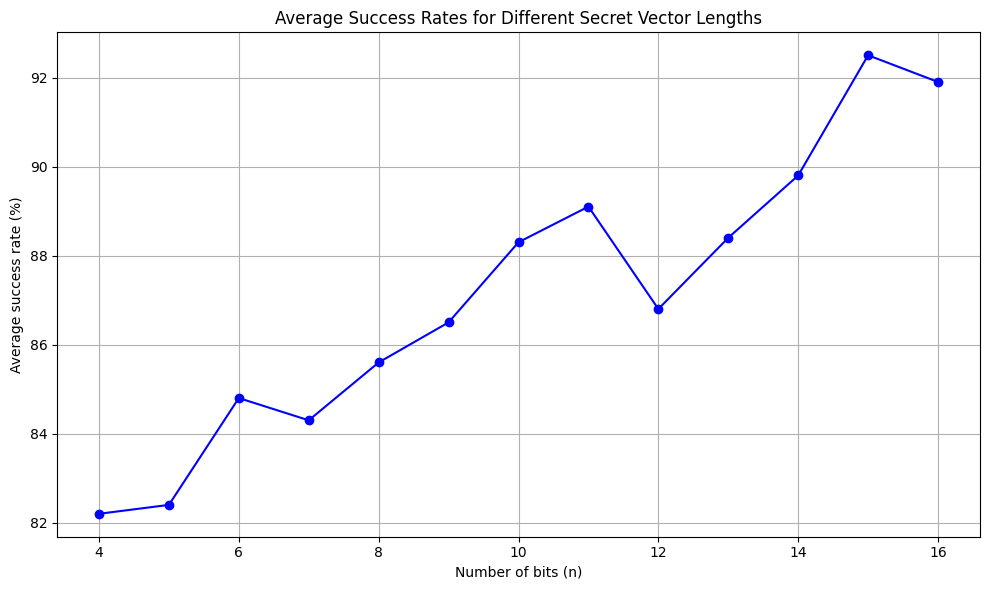

In [18]:
p = 0.2  # Noise probability
trials = 100  # Number of trials per secret vector
secret_vectors_per_n = 10  # Number of random secret vectors per n

bit_lengths = range(4, 17)  # n = 4 to 16
average_success_rates = []

for n in bit_lengths:
    m = int(5 * n)  # Adjusting m to 5n for scalability
    success_rates_n = []
    
    for _ in range(secret_vectors_per_n):
        u = np.random.randint(2, size=n, dtype=np.uint8)
        success_count = 0
        
        for _ in range(trials):
            A, b = generate_lpn_instance(n, m, p, u)
            recovered_u = exponential_lpn_solver(A, b)
            if np.array_equal(recovered_u, u):
                success_count += 1
        
        success_rate = success_count / trials * 100
        success_rates_n.append(success_rate)
        print(f"Instance (n={n}, m={m}): Success Rate = {success_rate:.2f}%")
    
    # Average success rate for this n
    average_success_rate_n = np.mean(success_rates_n)
    average_success_rates.append(average_success_rate_n)
    print(f"n={n}, Average Success Rate: {average_success_rate_n:.2f}%, m={m}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bit_lengths, average_success_rates, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of bits (n)")
plt.ylabel("Average success rate (%)")
plt.title("Average Success Rates for Different Secret Vector Lengths")
plt.grid(True)
plt.tight_layout()
plt.show()

Instance (n=4, m=32): Success Rate = 89.00%
Instance (n=4, m=32): Success Rate = 95.00%
Instance (n=4, m=32): Success Rate = 98.00%
Instance (n=4, m=32): Success Rate = 96.00%
Instance (n=4, m=32): Success Rate = 90.00%
Instance (n=4, m=32): Success Rate = 92.00%
Instance (n=4, m=32): Success Rate = 95.00%
Instance (n=4, m=32): Success Rate = 90.00%
Instance (n=4, m=32): Success Rate = 96.00%
Instance (n=4, m=32): Success Rate = 96.00%
n=4, Average Success Rate: 93.70%, m=32
Instance (n=5, m=32): Success Rate = 91.00%
Instance (n=5, m=32): Success Rate = 85.00%
Instance (n=5, m=32): Success Rate = 94.00%
Instance (n=5, m=32): Success Rate = 93.00%
Instance (n=5, m=32): Success Rate = 91.00%
Instance (n=5, m=32): Success Rate = 92.00%
Instance (n=5, m=32): Success Rate = 94.00%
Instance (n=5, m=32): Success Rate = 95.00%
Instance (n=5, m=32): Success Rate = 91.00%
Instance (n=5, m=32): Success Rate = 95.00%
n=5, Average Success Rate: 92.10%, m=32
Instance (n=6, m=32): Success Rate = 84.

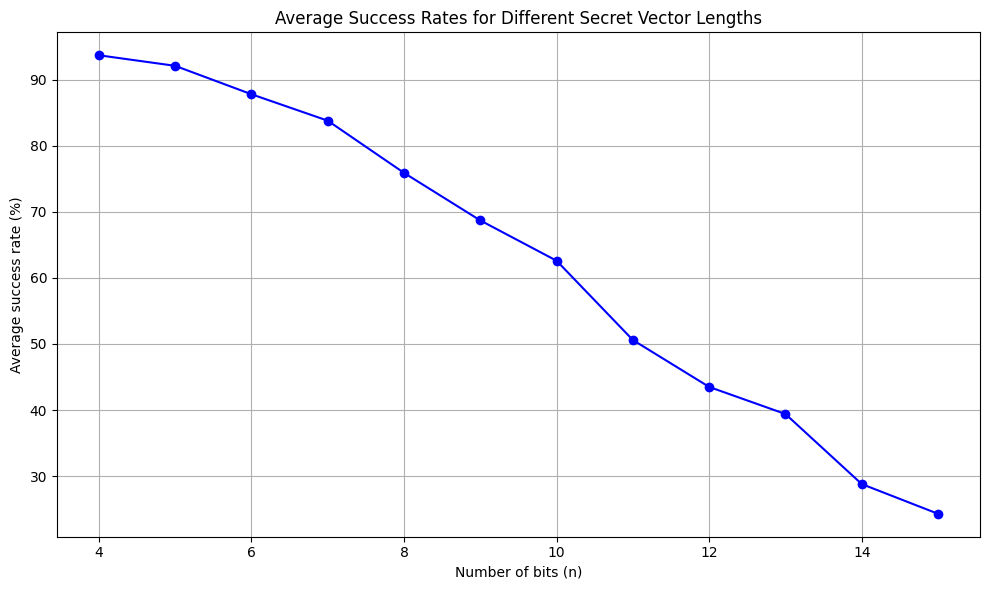

In [49]:
p = 0.2  # Noise probability
trials = 100  # Number of trials per secret vector
secret_vectors_per_n = 10  # Number of random secret vectors per n

bit_lengths = range(4, 16)  # n = 4 to 16
average_success_rates = []

for n in bit_lengths:
    m = 32  # Adjusting m to 5n for scalability
    success_rates_n = []
    
    for _ in range(secret_vectors_per_n):
        u = np.random.randint(2, size=n, dtype=np.uint8)
        success_count = 0
        
        for _ in range(trials):
            A, b = generate_lpn_instance(n, m, p, u)
            recovered_u = exponential_lpn_solver(A, b)
            if np.array_equal(recovered_u, u):
                success_count += 1
        
        success_rate = success_count / trials * 100
        success_rates_n.append(success_rate)
        print(f"Instance (n={n}, m={m}): Success Rate = {success_rate:.2f}%")
    
    # Average success rate for this n
    average_success_rate_n = np.mean(success_rates_n)
    average_success_rates.append(average_success_rate_n)
    print(f"n={n}, Average Success Rate: {average_success_rate_n:.2f}%, m={m}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bit_lengths, average_success_rates, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of bits (n)")
plt.ylabel("Average success rate (%)")
plt.title("Average Success Rates for Different Secret Vector Lengths")
plt.grid(True)
plt.tight_layout()
plt.show()